In [1]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Célula de imports
import pandas as pd
import numpy as np

# gerar graficos
import matplotlib.pyplot as plt
#gerar no proprio browser
%matplotlib inline

from sklearn.model_selection import learning_curve
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import LogisticRegression 



In [49]:
def curva_aprendizado(estimador, x, y):
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    pontos, desempenho_in, desempenho_out = learning_curve(estimador, x, y, train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    
    media_in = np.mean(desempenho_in, axis=1)
    desvio_in = np.std(desempenho_in, axis=1)
    media_out = np.mean(desempenho_out, axis=1)
    desvio_out = np.std(desempenho_out, axis=1)
    
    
    plt.plot(pontos, media_in, 'o-', color='red', label='Treinamento')
    plt.plot(pontos, media_out, 'o-', color='green', label='Teste')
    
    plt.fill_between(pontos, media_in - desvio_in, media_in + desvio_in, color='red', alpha=0.2)
    plt.fill_between(pontos, media_out - desvio_out, media_out + desvio_out, color='green', alpha=0.2)
    
    
    plt.legend()
    
    return plt

In [6]:
# header padrao true, se nao tiver nome de coluna add header false
dados = pd.read_csv('titanic.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# ver poucos dados para nao ser influenciado
dados.head()
# dados aleatorios com quantidade definida
dados.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.550,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.000,NaN,S


In [11]:
# linhas e colunas do arquivo
dados.shape

(891, 12)

In [13]:
pla = Perceptron()

In [27]:
x = dados.loc[: ,dados.columns != 'Survived']
y = dados['Survived']

In [19]:
dados = pd.get_dummies(dados)

In [24]:
dados.isnull().sum().sort_values(ascending=False)

Age                                                       177
Embarked_S                                                  0
Name_Nakid, Mr. Sahid                                       0
Name_Moussa, Mrs. (Mantoura Boulos)                         0
Name_Moutal, Mr. Rahamin Haim                               0
Name_Mudd, Mr. Thomas Charles                               0
Name_Mullens, Miss. Katherine "Katie"                       0
Name_Murdlin, Mr. Joseph                                    0
Name_Murphy, Miss. Katherine "Kate"                         0
Name_Murphy, Miss. Margaret Jane                            0
Name_Myhrman, Mr. Pehr Fabian Oliver Malkolm                0
Name_Naidenoff, Mr. Penko                                   0
Name_Najib, Miss. Adele Kiamie "Jane"                       0
Name_Nakid, Miss. Maria ("Mary")                            0
Name_Nankoff, Mr. Minko                                     0
Name_Moubarek, Master. Gerios                               0
Name_Nas

In [25]:
# completando dados vazios de idade com 90
dados['Age'].fillna(90, inplace=True)

In [30]:
# calculando tempo para achar uma reta de separação dos dados
# %timeit pla.fit(x,y)

pla.fit(x,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
pla.score(x,y)

0.6285072951739619

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

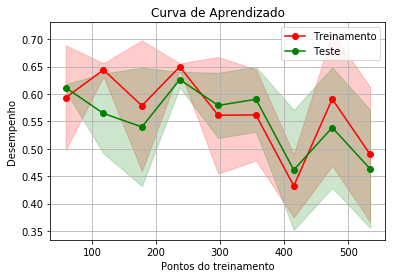

In [50]:
curva_aprendizado(pla, x, y)

In [52]:
reglog = LogisticRegression()
reglog.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
reglog.score(x,y)

0.9236812570145904

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

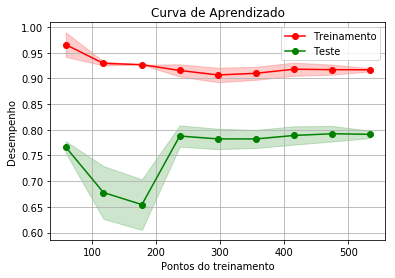

In [55]:
curva_aprendizado(reglog,x,y)